### **Preprocessing Step**

**Connection to Drive**

In [ ]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#to show current working directory
!pwd
!ls
%cd drive/MyDrive/Google_Colab
!ls

/content
drive  sample_data
/content/drive/MyDrive/Google_Colab
Project.ipynb  proje.ipynb  spectrograms


**Import Libraries**

In [ ]:
#importing libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

**Path of Spectrograms**

In [ ]:
path = '/content/drive/MyDrive/Google_Colab/spectrograms'

**Data Transform**

GrayScale-Resize-Normalization

In [ ]:
%%time

X_data = []
y_data = []

for subdir, dirs, files in os.walk(path):
  for file in files:
    pic = cv2.imread(os.path.join(subdir, file))
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    pic = cv2.resize(pic, (32, 32))

    X_data.append(pic)
    y_data.append(int(subdir[-1]))

X = np.array(X_data) / 255
y = np.array(y_data).reshape(-1,1)

print(X.shape)
print(y.shape)

(8732, 32, 32)
(8732, 1)
CPU times: user 38.8 s, sys: 5.04 s, total: 43.8 s
Wall time: 3min 6s


**Variables Control**

In [ ]:
print(X[0:2])
print(y[0:2])

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.3372549  0.34509804 0.28235294 ... 0.         0.         0.        ]
  [0.48235294 0.45098039 0.17254902 ... 0.         0.         0.        ]
  [0.74117647 0.81176471 0.39215686 ... 0.24705882 0.14901961 0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.20784314 ... 0.         0.         0.        ]
  [0.         0.02745098 0.27843137 ... 0.         0.         0.        ]
  ...
  [0.         0.35686275 0.48235294 ... 0.         0.         0.        ]
  [0.         0.60784314 0.5372549  ... 0.05490196 0.0745098  0.14117647]
  [0.1372549  0.70196078 0.78431373 ... 0.41176471 0.42745098 0.39215686]]]
[[6]
 [6]]


**Picture Control**

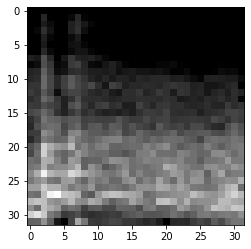

(32, 32)


In [ ]:
plt.imshow(X[100], cmap="gray")
plt.show()

print(X[100].shape)

**Train-Test-Validation Datasets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 6112
y_train: 6112
X_val: 1310
y_val: 1310
X_test: 1310
y_test: 1310


**Saving Train-Test-Validation Datasets**

In [ ]:
pathnew = '/content/drive/MyDrive/Google_Colab'

np.save(os.path.join(pathnew, 'X_train'), X_train)
np.save(os.path.join(pathnew, 'y_train'), y_train)

np.save(os.path.join(pathnew, 'X_val'), X_val)
np.save(os.path.join(pathnew,'y_val'), y_val)

np.save(os.path.join(pathnew, 'X_test'), X_test)
np.save(os.path.join(pathnew, 'y_test'), y_test)